In [14]:
import rasterio as rio
import rioxarray as rxr
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import MultiPolygon
from rasterio.mask import mask
import os
thomas_fire_bs = r'D:/imagery/masters/output/S2_tf_dNBR.tif'
thomas_fire_shp = r'D:/imagery/masters/baer/thm2017_Basin_DFPredictions_15min_12mmh.shp'

output_directory = r'D:/imagery/masters/output/'


In [8]:
shape = gpd.read_file(thomas_fire_shp)
print(shape)


      BASIN_ID  Shape_Leng    Shape_Area  Segment_ID  Acc_Cl  Perim_Buff  \
0          123     16060.0  6.322700e+06         123     1.0          10   
1          155      3140.0  2.716000e+05         155     1.0          10   
2          167      1800.0  7.260000e+04         167     1.0          10   
3          172      2720.0  2.340000e+05         172     1.0          10   
4          184      1540.0  4.900000e+04         184     1.0          10   
...        ...         ...           ...         ...     ...         ...   
1731     44218      2880.0  2.577000e+05       44218     1.0          10   
1732     44238      6260.0  8.933000e+05       44238     1.0          10   
1733     44256      1140.0  3.360000e+04       44256     1.0          10   
1734     44320      3020.0  1.722000e+05       44320     1.0          10   
1735     44339      7960.0  1.424200e+06       44339     1.0          10   

      InsidePeri  OutsidePer  Fire_ID     Fire_Segme  ...       LnV  \
0              0

In [16]:
with rio.open(thomas_fire_bs) as src:
    for idx, row in shape.iterrows():
        basin_id = row['BASIN_ID']
        geom = [row['geometry']]
        
        out_image, out_transform = mask(src, geom, crop=True)
        out_meta = src.meta.copy()
        out_meta.update({
            "driver": "GTiff",
            "height": out_image.shape[1],
            "width": out_image.shape[2],
            "transform": out_transform,
            "crs": src.crs
        })

        out_tif_path = os.path.join(output_directory + f'basin_{basin_id}_dNBR.tif')
        with rio.open(out_tif_path, "w", **out_meta) as dest:
            dest.write(out_image)
        break

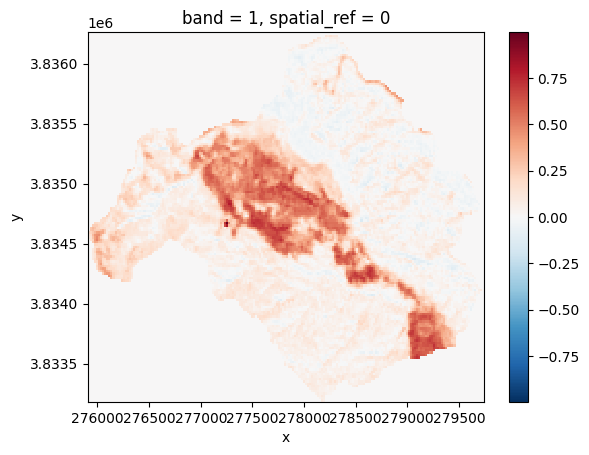

In [23]:
basin = rxr.open_rasterio(r'D:/imagery/masters/output/basin_123_dNBR.tif')
basin.plot()